In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.utils import plot_model

from keras.layers import Input, Dense
from keras.models import Model

In [2]:
from tensorflow.keras.utils import plot_model

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


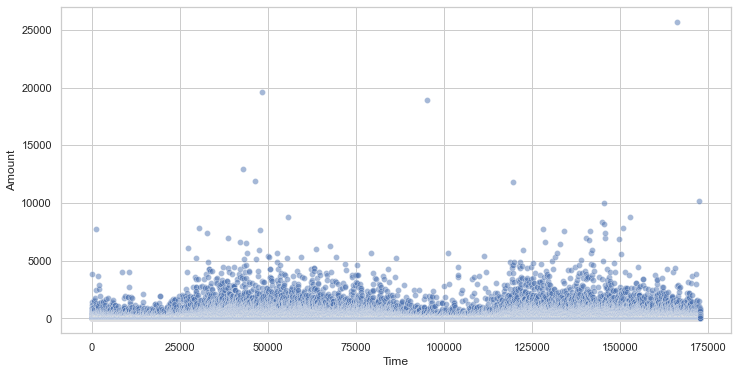

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Time", y="Amount", data=data, alpha=0.5)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

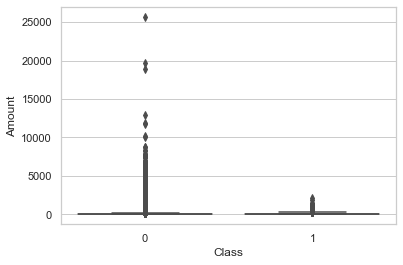

In [8]:
sns.boxplot(x="Class",y="Amount", data= data)

<AxesSubplot:xlabel='Class', ylabel='Time'>

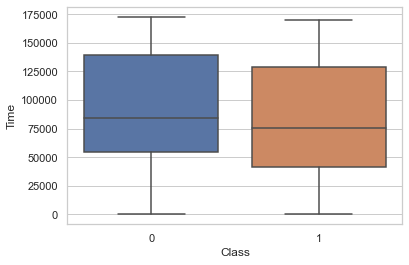

In [9]:
sns.boxplot(x="Class",y="Time", data= data)

In [10]:
# data = data.drop('Time', axis = 1)

In [11]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
fraud_data = data[data["Class"] == 1]
non_fraud_data = data[data["Class"] == 0]

In [13]:
X_non_fraud = non_fraud_data.drop(columns=["Class"])
y_non_fraud = non_fraud_data["Class"]

X_train, X_non_fraud_test, y_train, y_non_fraud_test = train_test_split(X_non_fraud, y_non_fraud, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(227452, 30)

In [15]:
X_test = pd.concat([X_non_fraud_test, fraud_data.drop(columns=["Class"])], axis=0)
y_test = pd.concat([y_non_fraud_test, fraud_data["Class"]], axis=0)

In [16]:
y_train.value_counts()

0    227452
Name: Class, dtype: int64

In [17]:
y_test.value_counts()

0    56863
1      492
Name: Class, dtype: int64

In [18]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
228513,145544.0,-0.643139,0.323888,-0.253890,-0.229861,-0.320347,-0.337035,0.016371,0.511599,0.664531,...,-0.284546,0.264600,0.641559,0.167731,0.639755,-0.782464,0.447755,-0.108167,0.041705,100.22
45271,42274.0,1.225032,0.309672,0.075764,1.172093,0.049135,-0.352607,0.201216,-0.067050,-0.178754,...,-0.152394,-0.006992,0.112232,-0.198475,0.012800,0.853472,-0.257058,0.005308,-0.000296,1.00
115677,73968.0,1.095432,-0.082201,0.557413,0.672936,-0.471535,-0.151216,-0.182268,0.145532,0.146361,...,-0.138275,-0.138794,-0.375464,0.083377,0.224129,0.211780,0.211859,-0.021616,0.005800,28.90
161391,114146.0,0.225211,-0.101200,0.597409,-1.261143,-0.482422,-0.508390,0.338604,-0.122385,-0.962887,...,-0.402944,-0.242758,-0.249014,0.263371,1.144209,-0.580231,0.423566,-0.010651,0.016041,63.00
270370,164044.0,-2.001444,-1.084340,0.042545,-1.061416,1.004215,2.054346,2.173900,0.347613,-0.991819,...,1.054444,0.699938,1.070446,0.585468,-0.922432,1.156154,0.683653,-0.197059,0.055466,492.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120126,75718.0,-1.438013,1.298178,0.909734,-0.495798,0.255640,-0.766527,0.449792,0.361424,-0.492433,...,-0.160198,-0.141175,-0.479615,0.105791,0.038759,-0.299486,-0.087374,-0.033205,0.108152,4.99
259649,159214.0,0.256621,0.223809,0.975735,-0.220988,-0.270464,0.568080,-0.394989,-0.637367,0.416232,...,-0.084076,1.080174,0.763228,-0.220929,0.824970,0.789579,-0.064883,0.223809,0.257101,39.95
132194,79893.0,-0.138855,-0.976921,0.883736,-3.393556,1.142488,3.914621,-1.119220,0.869570,-1.539373,...,-0.153597,-0.228985,-0.147826,-0.093426,0.977747,-0.269920,-0.413884,0.018587,-0.078387,20.00
147150,88181.0,-0.422831,0.239428,1.512375,-1.075881,-0.809157,-0.089498,0.838381,-0.463100,-0.698558,...,-0.469495,-0.568205,-0.860065,-0.002557,-0.079295,-0.594139,-0.644110,-0.140223,-0.106076,123.75


In [20]:
scaler = StandardScaler()

X_train["Amount"] = scaler.fit_transform(X_train["Amount"].values.reshape(-1, 1))
X_test["Amount"] = scaler.transform(X_test["Amount"].values.reshape(-1, 1))

In [21]:
X_train["Time"] = scaler.fit_transform(X_train["Time"].values.reshape(-1, 1))
X_test["Time"] = scaler.transform(X_test["Time"].values.reshape(-1, 1))

In [23]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
228513,1.068014,-0.643139,0.323888,-0.253890,-0.229861,-0.320347,-0.337035,0.016371,0.511599,0.664531,...,-0.284546,0.264600,0.641559,0.167731,0.639755,-0.782464,0.447755,-0.108167,0.041705,0.047095
45271,-1.106108,1.225032,0.309672,0.075764,1.172093,0.049135,-0.352607,0.201216,-0.067050,-0.178754,...,-0.152394,-0.006992,0.112232,-0.198475,0.012800,0.853472,-0.257058,0.005308,-0.000296,-0.350450
115677,-0.438861,1.095432,-0.082201,0.557413,0.672936,-0.471535,-0.151216,-0.182268,0.145532,0.146361,...,-0.138275,-0.138794,-0.375464,0.083377,0.224129,0.211780,0.211859,-0.021616,0.005800,-0.238663
161391,0.406999,0.225211,-0.101200,0.597409,-1.261143,-0.482422,-0.508390,0.338604,-0.122385,-0.962887,...,-0.402944,-0.242758,-0.249014,0.263371,1.144209,-0.580231,0.423566,-0.010651,0.016041,-0.102035
270370,1.457491,-2.001444,-1.084340,0.042545,-1.061416,1.004215,2.054346,2.173900,0.347613,-0.991819,...,1.054444,0.699938,1.070446,0.585468,-0.922432,1.156154,0.683653,-0.197059,0.055466,1.616841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120126,-0.402018,-1.438013,1.298178,0.909734,-0.495798,0.255640,-0.766527,0.449792,0.361424,-0.492433,...,-0.160198,-0.141175,-0.479615,0.105791,0.038759,-0.299486,-0.087374,-0.033205,0.108152,-0.334464
259649,1.355806,0.256621,0.223809,0.975735,-0.220988,-0.270464,0.568080,-0.394989,-0.637367,0.416232,...,-0.084076,1.080174,0.763228,-0.220929,0.824970,0.789579,-0.064883,0.223809,0.257101,-0.194389
132194,-0.314123,-0.138855,-0.976921,0.883736,-3.393556,1.142488,3.914621,-1.119220,0.869570,-1.539373,...,-0.153597,-0.228985,-0.147826,-0.093426,0.977747,-0.269920,-0.413884,0.018587,-0.078387,-0.274323
147150,-0.139637,-0.422831,0.239428,1.512375,-1.075881,-0.809157,-0.089498,0.838381,-0.463100,-0.698558,...,-0.469495,-0.568205,-0.860065,-0.002557,-0.079295,-0.594139,-0.644110,-0.140223,-0.106076,0.141372


In [24]:
input_layer = Input(shape=(X_train.shape[1],))

In [25]:
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

In [26]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

In [27]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 30)                3870  

In [29]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
889/889 [==============================] - 3s 3ms/step - loss: 0.8433
Epoch 2/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7923
Epoch 3/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7831
Epoch 4/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7770
Epoch 5/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7766
Epoch 6/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7765
Epoch 7/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7763
Epoch 8/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7762
Epoch 9/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7761
Epoch 10/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7760
Epoch 11/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7759
Epoch 12/50
889/889 [==============================] - 2s 3ms/step - loss: 0.7759
Epoch 13/50
889/889 [====

In [30]:
reconstructed = autoencoder.predict(X_test)

mse = ((X_test - reconstructed) ** 2).mean(axis=1)

mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df

1793/1793 [==============================] - 2s 925us/step


,Reconstruction_error,True_class
138028,0.147974,0
63099,0.099930,0
73411,0.492709,0
164247,0.239082,0
148999,0.755081,0
...,...,...
279863,6.219348,1
280143,3.553999,1
280149,2.856169,1
281144,6.461148,1


In [31]:
error_df.describe()

,Reconstruction_error,True_class
count,57355.000000,57355.000000
mean,0.976351,0.008578
std,8.990711,0.092221
min,0.032406,0.000000
25%,0.244277,0.000000
50%,0.403345,0.000000
75%,0.652925,0.000000
max,1795.280413,1.000000


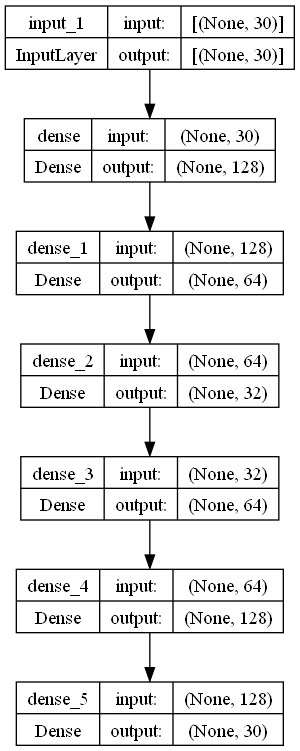

In [32]:
plot_model(autoencoder, to_file="autoencoder.png", show_shapes=True)

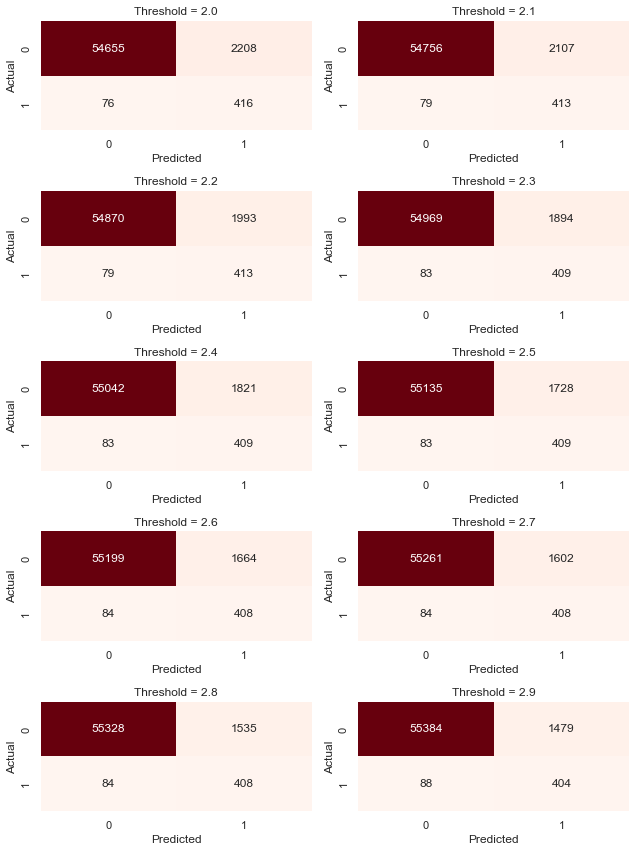

In [46]:
num_thresholds = 10

n_rows = 5
n_cols = num_thresholds // n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 12))

for i, ax in enumerate(axes.ravel()):
    if i < num_thresholds:
        threshold = (i + 20) / 10.0
        y_pred = [1 if error > threshold else 0 for error in mse]
        confusion = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False, ax=ax)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title(f"Threshold = {threshold}")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [47]:
threshold = 2.9

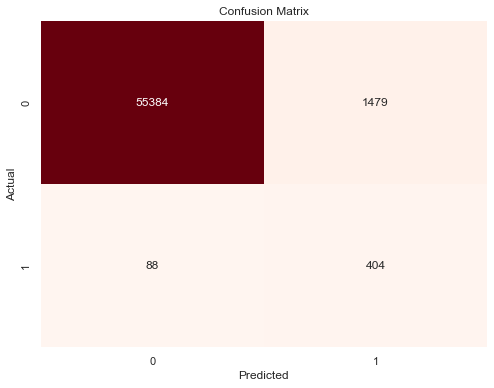

In [48]:
y_pred = [1 if error > threshold else 0 for error in mse]
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
accuracy = accuracy_score(y_test, y_pred)

In [50]:
accuracy

0.9726789294743265

In [51]:
report = classification_report(y_test, y_pred)

In [52]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56863
           1       0.21      0.82      0.34       492

    accuracy                           0.97     57355
   macro avg       0.61      0.90      0.66     57355
weighted avg       0.99      0.97      0.98     57355



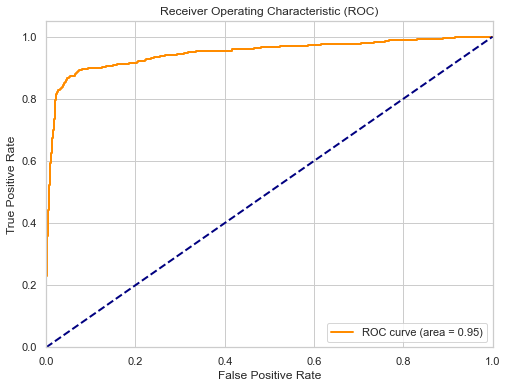

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, mse)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

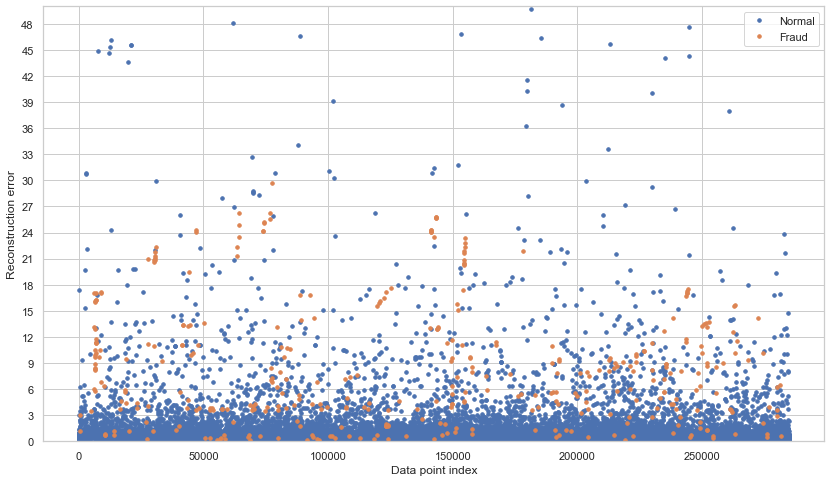

In [54]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.legend()
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.yticks(range(0, 51, 3)) 

plt.ylim(0, 50);

plt.show();

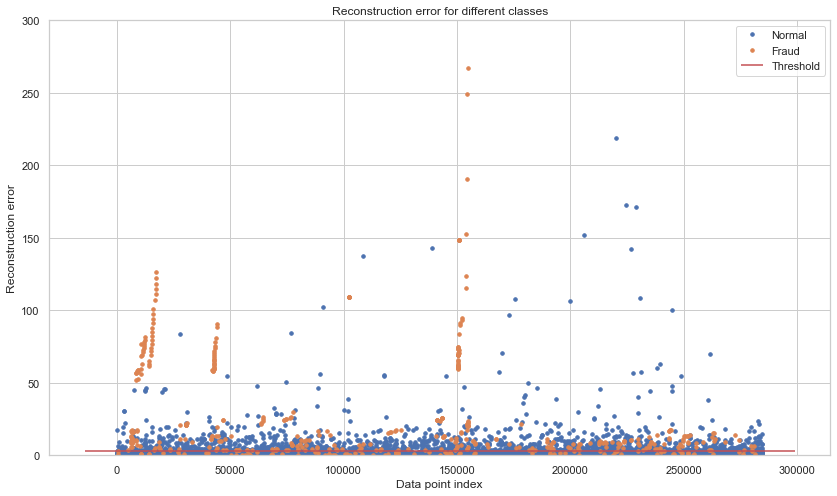

In [55]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 300);

plt.show();

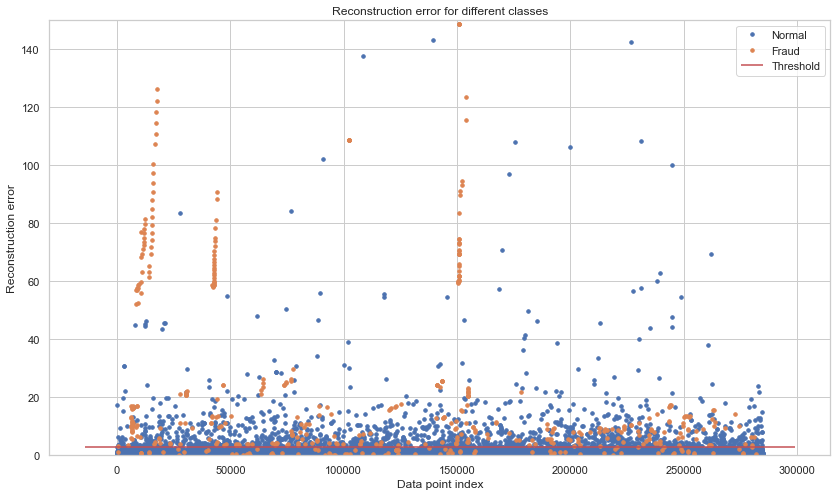

In [56]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 150);

plt.show();

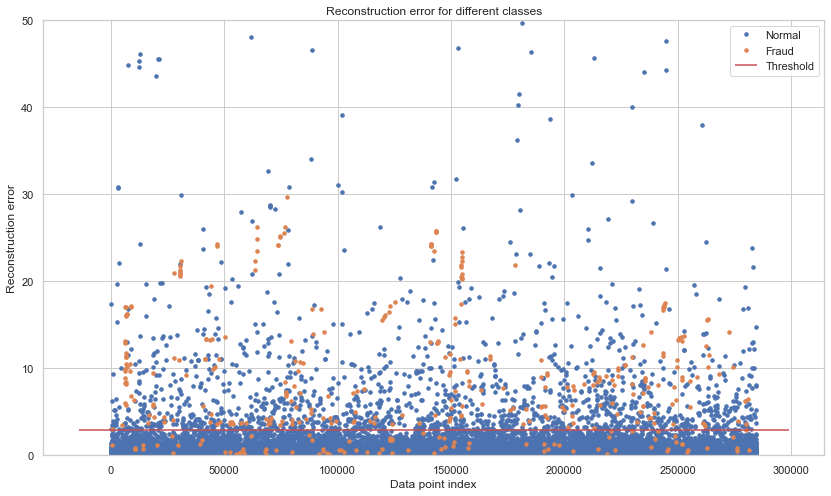

In [57]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 50);

plt.show();

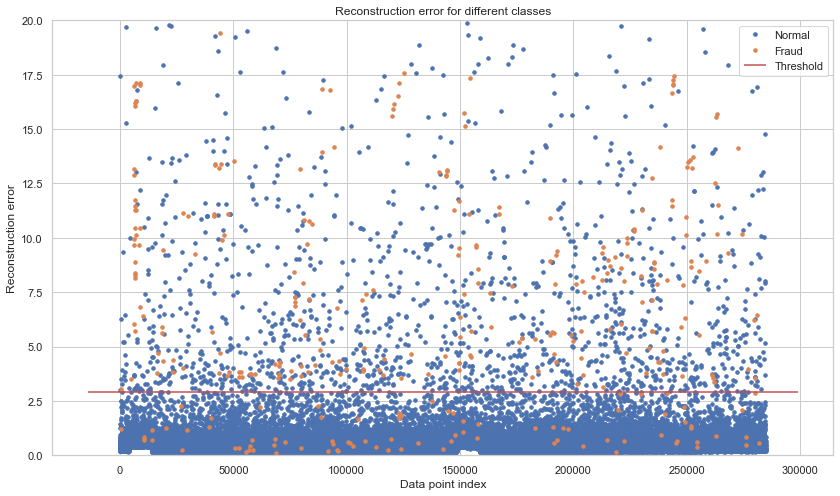

In [58]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.ylim(0, 20);

plt.show();